# 準備

In [1]:
import warnings
import torch

device = torch.device(
    "cuda" if torch.cuda.is_available() else "cpu"
)
dtype = torch.float16
variant = "fp16"
seed = 0

warnings.simplefilter("ignore", FutureWarning)

# Prompt-to-Prompt

- 参考: https://github.com/huggingface/diffusers/tree/main/examples/community#prompt2prompt-pipeline

In [2]:
from diffusers import DiffusionPipeline

model_id = "stable-diffusion-v1-5/stable-diffusion-v1-5"

prompt2prompt = DiffusionPipeline.from_pretrained(
    model_id,
    custom_pipeline="pipeline_prompt2prompt",
)

cannot get type annotation for Parameter vae of <class 'diffusers_modules.git.pipeline_prompt2prompt.Prompt2PromptPipeline'>.
cannot get type annotation for Parameter text_encoder of <class 'diffusers_modules.git.pipeline_prompt2prompt.Prompt2PromptPipeline'>.
cannot get type annotation for Parameter tokenizer of <class 'diffusers_modules.git.pipeline_prompt2prompt.Prompt2PromptPipeline'>.
cannot get type annotation for Parameter unet of <class 'diffusers_modules.git.pipeline_prompt2prompt.Prompt2PromptPipeline'>.
cannot get type annotation for Parameter scheduler of <class 'diffusers_modules.git.pipeline_prompt2prompt.Prompt2PromptPipeline'>.
cannot get type annotation for Parameter safety_checker of <class 'diffusers_modules.git.pipeline_prompt2prompt.Prompt2PromptPipeline'>.
cannot get type annotation for Parameter feature_extractor of <class 'diffusers_modules.git.pipeline_prompt2prompt.Prompt2PromptPipeline'>.
cannot get type annotation for Parameter image_encoder of <class 'diffu

Loading pipeline components...:   0%|          | 0/7 [00:00<?, ?it/s]

In [3]:
from diffusers_modules.git.pipeline_prompt2prompt import (
    Prompt2PromptPipeline,
)

assert isinstance(prompt2prompt, Prompt2PromptPipeline)
prompt2prompt = prompt2prompt.to(device=device)

## 簡易パイプライン実行関数の定義

In [4]:
from typing import Any, Dict, List

from diffusers.utils import make_image_grid
from PIL.Image import Image as PilImage


def prompt_to_prompt(
    prompt_before: str,
    prompt_after: str,
    cross_attention_kwargs: Dict[str, Any],
    width: int = 512,
    height: int = 512,
    num_inference_steps: int = 50,
) -> List[PilImage]:
    outputs = prompt2prompt(
        prompt=[prompt_before, prompt_after],
        width=width,
        height=height,
        num_inference_steps=num_inference_steps,
        cross_attention_kwargs=cross_attention_kwargs,
        generator=torch.manual_seed(seed),
    )
    return outputs.images

## Relace Edit

  0%|          | 0/50 [00:00<?, ?it/s]

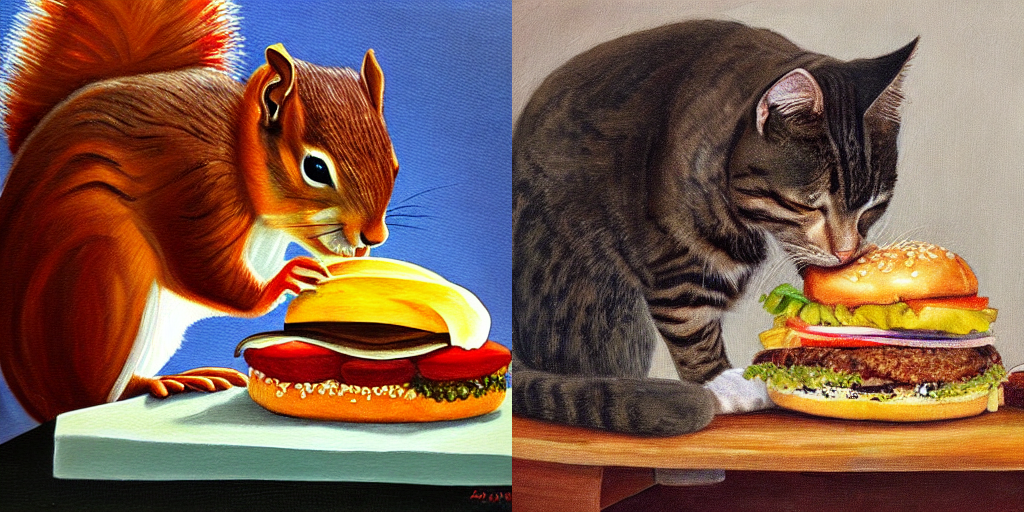

In [5]:
prompt_before = "A painting of a squirrel eating a burger"
prompt_after = "A painting of a cat eating a burger"

images = prompt_to_prompt(
    prompt_before=prompt_before,
    prompt_after=prompt_after,
    cross_attention_kwargs={
        "edit_type": "replace",
        "cross_replace_steps": 0.4,
        "self_replace_steps": 0.4,
    },
)
make_image_grid(images, rows=1, cols=len(images))

## Replace Edit with Loacl Blend

  0%|          | 0/50 [00:00<?, ?it/s]

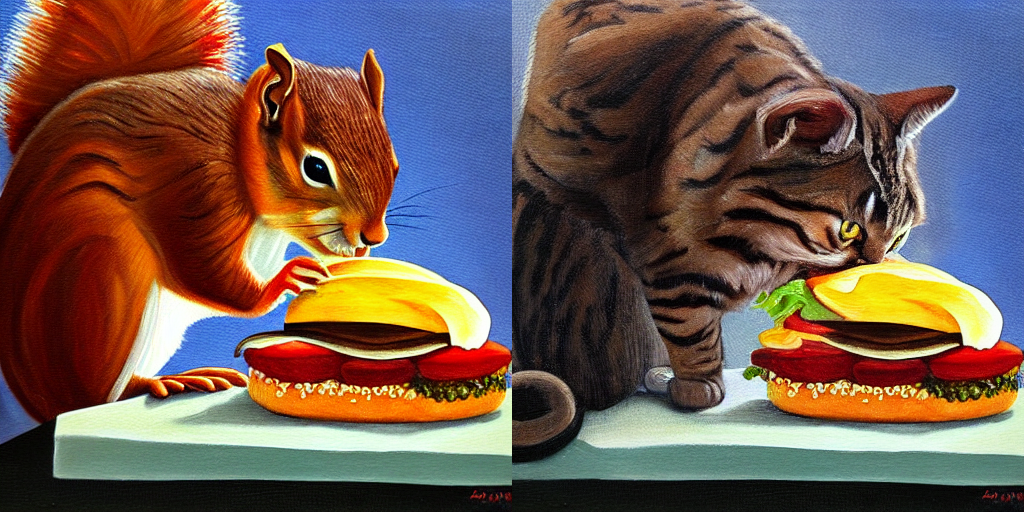

In [6]:
prompt_before = "A painting of a squirrel eating a burger"
prompt_after = "A painting of a cat eating a burger"

images = prompt_to_prompt(
    prompt_before=prompt_before,
    prompt_after=prompt_after,
    cross_attention_kwargs={
        "edit_type": "replace",
        "cross_replace_steps": 0.4,
        "self_replace_steps": 0.4,
        "local_blend_words": ["squirrel", "cat"],
    },
)
make_image_grid(images, rows=1, cols=len(images))

## Refine Edit

  0%|          | 0/50 [00:00<?, ?it/s]

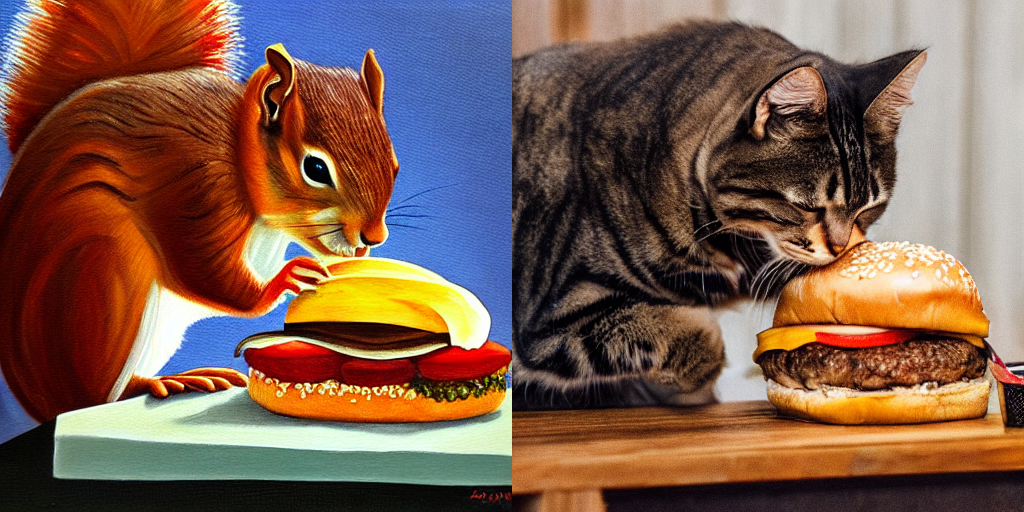

In [7]:
prompt_before = "A painting of a squirrel eating a burger"
prompt_after = "A real photo of a cat eating a burger"

images = prompt_to_prompt(
    prompt_before=prompt_before,
    prompt_after=prompt_after,
    cross_attention_kwargs={
        "edit_type": "refine",
        "cross_replace_steps": 0.9,
        "self_replace_steps": 0.2,
    },
)
make_image_grid(images, rows=1, cols=len(images))

## Refine Edit with Local Blend

  0%|          | 0/50 [00:00<?, ?it/s]

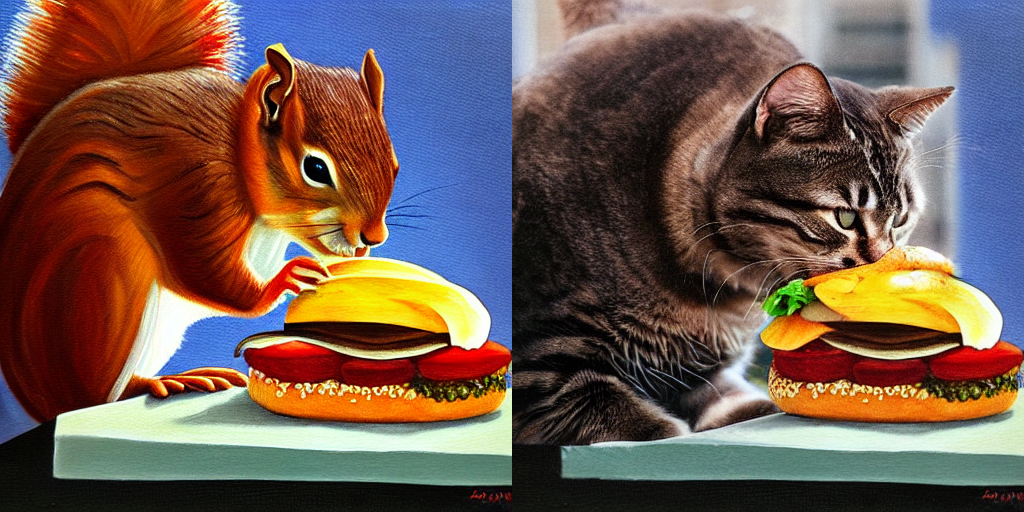

In [8]:
prompt_before = "A painting of a squirrel eating a burger"
prompt_after = "A real photo of a cat eating a burger"

images = prompt_to_prompt(
    prompt_before=prompt_before,
    prompt_after=prompt_after,
    cross_attention_kwargs={
        "edit_type": "refine",
        "cross_replace_steps": 0.9,
        "self_replace_steps": 0.2,
        "local_blend_words": ["squirrel", "cat"],
    },
)
make_image_grid(images, rows=1, cols=len(images))

## Rewiehgt Edit

  0%|          | 0/50 [00:00<?, ?it/s]

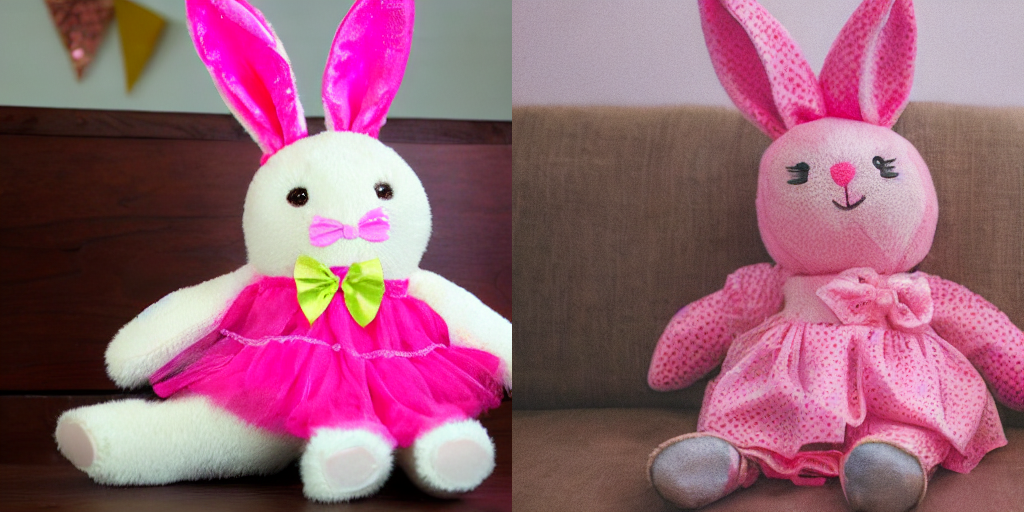

In [9]:
prompt = "a photo of smiling pink bunny doll"

images = prompt_to_prompt(
    prompt_before=prompt,
    prompt_after=prompt,
    cross_attention_kwargs={
        "edit_type": "reweight",
        "cross_replace_steps": 0.8,
        "self_replace_steps": 0.8,
        "equalizer_words": ["smiling"],
        "equalizer_strengths": [20],
    },
)
make_image_grid(images, rows=1, cols=len(images))